In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df.shape

(15, 2)

In [4]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [5]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [6]:
df.shape

(15, 2)

In [7]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

##EDA

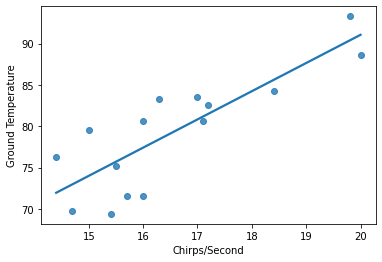

In [21]:
import seaborn as sb
sb.regplot(x = "Chirps/Second",y = "Ground Temperature",ci = None,data = df)

In [14]:
df.corr() #corelation between Chirps/Second and Ground Temperature

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


###There is strong linear relationship between the Chirps/Second	and Ground Temperature => no transfor is needed.

##Modelling

In [9]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']
y = y.to_frame()

In [15]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()                        
regressor.fit(x, y)

LinearRegression()

In [16]:
print('intercept:',regressor.intercept_) #c

intercept: [0.45931465]


In [17]:
print('coefficient:',regressor.coef_) # m

coefficient: [[0.20299973]]


In [18]:
w=float(input())
print("y=",(regressor.coef_*w)+regressor.intercept_)

3
y= [[1.06831384]]


##Chart the original data and the equation on the chart.

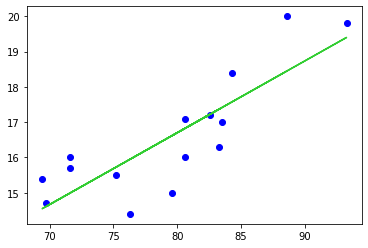

In [22]:
plt.scatter(x, y, color='blue')
plt.plot(x, regressor.predict(x), color='limegreen')

###Exploration

In [19]:
regressor.predict([[95]]) # Tem of extrapolation

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[19.74428913]])

###If the ground temperature reached 95, then at 19.74 approximate rate would you expect the crickets to be chirping

##Interpolation

In [20]:
(18 - regressor.intercept_) / regressor.coef_

array([[86.40743135]])

###Interpolation:- The approximate ground temperature that morning is 86.40

## Metrics R2

In [17]:
from sklearn import metrics 
print('R2- SCORE:', regressor.score(x, y))

R2- SCORE: 0.6922946529146998


####Here we are getting the value of R2 is 0.69

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [23]:
df = pd.read_fwf("brain_body.txt")

In [24]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [25]:
df.shape

(62, 2)

In [26]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [28]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [29]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [30]:
#df=df.drop_duplicates

##Outlier detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


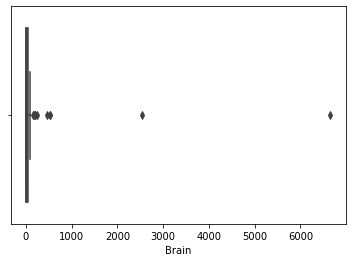

In [31]:
import seaborn as sns
sns.boxplot(df['Brain'])

###Brain column has the outliers.

###Remove Outliers using Capping method.bold text

In [32]:
##Q1 Q2 and IQR
Brain25 = df['Brain'].quantile(0.25)
Brain75 = df['Brain'].quantile(0.75)
iqr=Brain75 - Brain25
print("IQR =",iqr)
print("Q1 =",Brain25)
print("Q3 =",Brain75)

IQR = 47.6025
Q1 = 0.6000000000000001
Q3 = 48.2025


###Set the limits.

In [33]:
upper_limit = Brain75 + 1.5 * iqr
lower_limit = Brain25 - 1.5 * iqr
print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 119.60625
lower limit -70.80375000000001


In [34]:
df[df['Brain'] > upper_limit]
df[df['Brain'] < lower_limit]

,Brain,Body


In [35]:
new_df = df[df['Brain'] < upper_limit]
new_df.shape

(52, 2)

####Apply capping

In [36]:
new_df_cap = df.copy()
new_df_cap['Brain'] = np.where(
    new_df_cap['Brain'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Brain'] < lower_limit,
        lower_limit,
        new_df_cap['Brain']
    )
)

###After Removing outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


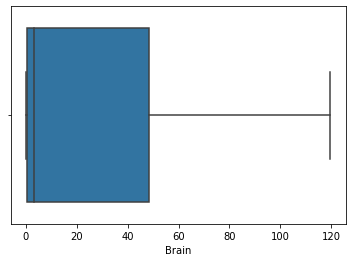

In [37]:
sns.boxplot(new_df_cap['Brain'])

###Removing outliers from Body column using Capping technique.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


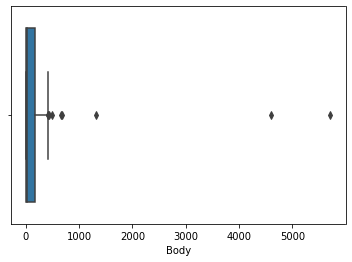

In [38]:
sns.boxplot(df['Body'])

###Applying capping technique to remove outliers from Body column. 

In [39]:
##Q1 Q2 and IQR
Body25 = df['Body'].quantile(0.25)
Body75 = df['Body'].quantile(0.75)
iqr=Body75 - Body25
print(iqr)
print(Body25)
print(Body75)

161.75
4.25
166.0


###Set the Limits

In [40]:
upper_limit_1 = Body75 + 1.5 * iqr
lower_limit_1 = Body25 - 1.5 * iqr
print(upper_limit_1)
print(lower_limit_1)

408.625
-238.375


In [41]:
df[df['Body'] > upper_limit_1]
df[df['Body'] < lower_limit_1]

,Brain,Body


In [42]:
new_df = df[df['Body'] < upper_limit_1]
new_df.shape

(53, 2)

In [43]:
new_df_cap = df.copy()
new_df_cap['Body'] = np.where(
    new_df_cap['Body'] > upper_limit_1,
    upper_limit_1,
    np.where(
        new_df_cap['Body'] < lower_limit_1,
        lower_limit_1,
        new_df_cap['Body']
    )
)

###After Removing outliers from Body column boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


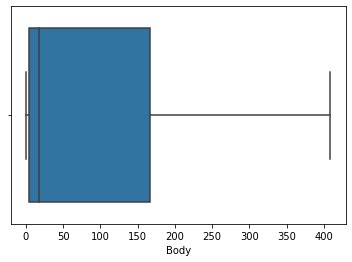

In [44]:
sns.boxplot(new_df_cap['Body'])

##**EDA**

###Plot Before applying capping. 

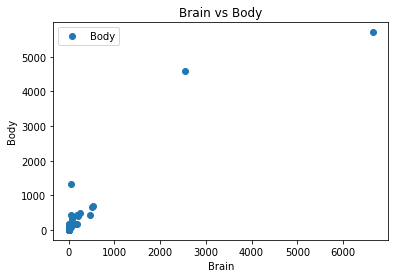

In [51]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

####Plot after removing the outliers

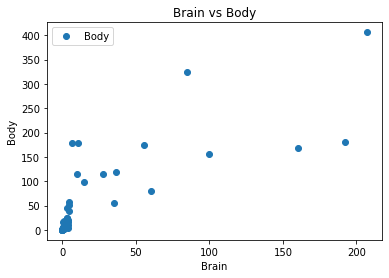

In [52]:
new_df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [53]:
new_df.corr() #corelation between Brain and Body

,Brain,Body
Brain,1.000000,0.799676
Body,0.799676,1.000000


###There is a linear relationship between Brain and Body => we can go ahead and develop a linear regression model. No transformation required.

##The linear regression equation for this data for brain weight to body weight.

In [54]:
x = new_df['Brain']
x = x.to_frame()
y = new_df['Body']
y = y.to_frame()

In [55]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x, y) 

LinearRegression()

In [56]:
print('intercept:',regressor.intercept_) # c

intercept: [23.86932692]


In [57]:
print('coefficient:',regressor.coef_) # m

coefficient: [[1.46281354]]


In [58]:
k=float(input())
print("y=",(regressor.coef_*k)+regressor.intercept_)

3
y= [[28.25776753]]


In [59]:
regressor.predict([[13]]) #  extrapolation

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[42.88590292]])

##Chart the original data and the equation on the chart.

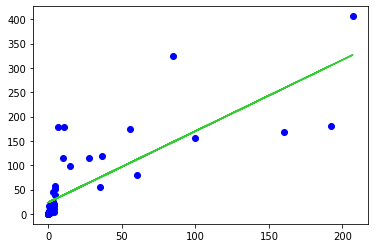

In [60]:
plt.scatter(x, y, color='blue')
plt.plot(x, regressor.predict(x), color='limegreen')

##Metrics

In [61]:
from sklearn import metrics 
print('R2- SCORE:', regressor.score(x, y))

R2- SCORE: 0.639481003955397


###As the value of R2 is 0.63 we are getting the good model.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [4]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [5]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [7]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [8]:
df.shape

(52, 6)

In [9]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(52, 6)

In [12]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

##EDA

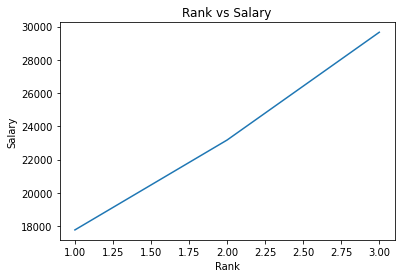

In [13]:
#import seaborn as sb
#sb.regplot(x = "Rank",y = "Salary", ci = None,data = df)
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [14]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


###There is strong linear relationship between rank and salary => as rank increses salary is also increses no need of transform.

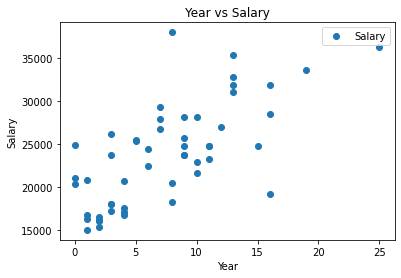

In [15]:
#import seaborn as sb
#sb.regplot(x = "Year",y = "Salary", ci = None,data = df)
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [16]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


###There is strong relation between year and salary no need of transform

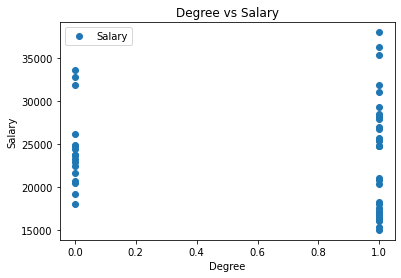

In [17]:
#import seaborn as sb
#sb.regplot(x = "Degree",y = "Salary", ci = None,data = df)
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [18]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


###There is no linear relationship between degree and salary

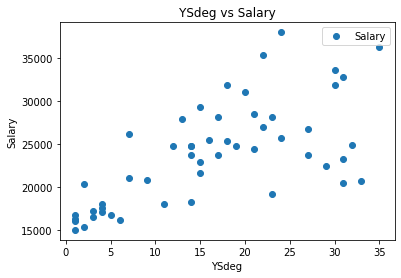

In [19]:
#import seaborn as sb
#sb.regplot(x = "YSdeg",y = "Salary", ci = None,data = df)
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [20]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


There is linear relationship between YSdeg and salary no need of transform.

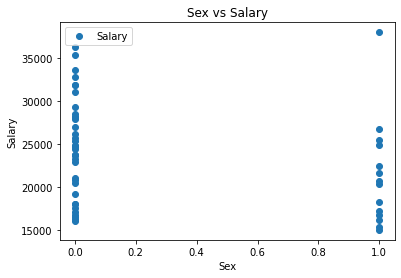

In [21]:
#import seaborn as sb
#sb.regplot(x = "Sex",y = "Salary", ci = None,data = df)
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [22]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


###There is no linear relationship between sex and salary

In [23]:
X = df[['Rank', 'Year', 'YSdeg']].values 
y = df['Salary'].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

###Model Training

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
coeff_df = pd.DataFrame(regressor.coef_,['Rank', 'Year',
       'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df


,Coefficient
Rank,4652.771917
Year,2214.533619
YSdeg,-498.309852


In [28]:
print('intercept:',regressor.intercept_) # c 

intercept: 23655.90243902439


In [29]:
print('coefficient:',regressor.coef_) # m

coefficient: [4652.77191683 2214.53361931 -498.30985177]


In [31]:
a=float(input())
print("y=",regressor.coef_*a+regressor.intercept_)

3
y= [37614.21818953 30299.50329694 22160.97288371]


In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,22085.711958
1,17095,17260.333194
2,24750,26335.037263
3,22450,22243.607010
4,28200,29505.964712
5,21600,19146.986301
6,18075,16858.620843
7,23713,18792.875859
8,24800,24966.197403
9,33696,32788.162509


###Evaluation Matrics R2

In [34]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7012109096135274


###Here as the value of R2 is 0.70 it is the good model.

###Sex is not factor in salary